In [1]:
from LinClass import LinClass
from LinRegg import LinRegg
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
heartData = np.loadtxt('cleanedSAheart.data.txt', skiprows=1)[:, 1:]
arrayY = heartData[:,-1]
y = np.zeros((len(heartData), 2))
for ii in range(len(heartData)):
    if arrayY[ii] == 0:
        y[ii] = np.array([1, 0])
    elif arrayY[ii] == 1:
        y[ii] = np.array([0, 1])
    else:
        print('something wrong')
        print(ii)
        print(y[ii])
X = heartData[:,0:-1]
Xtrain, Xtest = X[:int(len(heartData)/3*2)], X[int(len(heartData)/3*2):]
ytrain, ytest = y[:int(len(heartData)/3*2)], y[int(len(heartData)/3*2):]

In [3]:
heartClass = LinClass(Xtrain, ytrain, indicatorArray = ['no heart attack', 'heart attack'])
heartClass.binaryLogisticRegg()

[-0.53246753 -0.08041447  0.2616338   0.20405611  0.17516855  0.27339959
  0.28150111 -0.17117332  0.08519574  0.4157916 ]


In [4]:
XtestStandardized = heartClass.standardizeTest(Xtest)
logisticFit = heartClass.logisticReggBestFit
correct = 0
total = 0
for ii in range(len(XtestStandardized)):
    x = XtestStandardized[ii]
    probability = math.exp(-np.dot(x, logisticFit))/(1 + math.exp(-np.dot(x, logisticFit)))
    if probability > 1/2:
        result = np.array([1, 0])
    else:
        result = np.array([0, 1])
    if (result == ytest[ii]).all():
        correct+=1
    total +=1
print(correct/total)
        

0.7597402597402597


In [5]:
heartClass.setProbabilities()
heartClass.setMeans()
heartClass.setLinearCovariance()
correct = 0
total = 0
for ii in range(len(Xtest)):
    x = Xtest[ii]
    guess = heartClass.optimizedLDASolve(x)
    index = np.nonzero(ytest[ii])[0][0]
    answer = heartClass.indicators[index]
    if (guess == answer):
        correct+=1
    total +=1
print(correct/total)

0.5454545454545454


In [6]:
correct = 0
total = 0
for ii in range(len(Xtest)):
    x = Xtest[ii]
    guess = heartClass.QDASolve(x)
    index = np.nonzero(ytest[ii])[0][0]
    answer = heartClass.indicators[index]
    if (guess == answer):
        correct+=1
    total +=1
print(correct/total)

0.5584415584415584


In [7]:
heartRegg = LinRegg(Xtrain, ytrain)
heartRegg.standardizePredictor()
heartRegg.RSSSolve()
bestFit = heartRegg.bestFit
XtestReggStandardized = heartRegg.standardizeTest(Xtest)
correct = 0
total = 0
for ii in range(len(XtestReggStandardized)):
    x = XtestReggStandardized[ii]
    guess = heartClass.determineClassRegg(x, bestFit)
    index = np.nonzero(ytest[ii])[0][0]
    answer = heartClass.indicators[index]
    if (guess == answer):
        correct+=1
    total +=1
print(correct/total)

0.7532467532467533


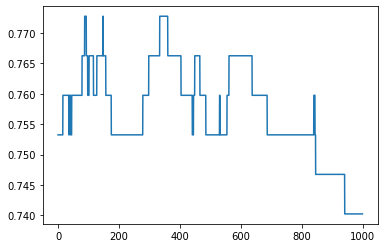

In [11]:
graphingX = np.arange(0, 1000, 0.5)
graphingY = np.zeros(2000)
XtestReggStandardized = heartRegg.standardizeTest(Xtest)
for ii in range(len(graphingX)):
    heartRegg.RSSRidgeSolve(complexity=graphingX[ii])
    bestFit = heartRegg.ridgeBestFit
    correct = 0
    total = 0
    for jj in range(len(XtestReggStandardized)):
        x = XtestReggStandardized[jj]
        guess = heartClass.determineClassRegg(x, bestFit)
        index = np.nonzero(ytest[jj])[0][0]
        answer = heartClass.indicators[index]
        if (guess == answer):
            correct+=1
        total +=1
    graphingY[ii] = correct/total
plt.plot(graphingX, graphingY)

In [12]:
print(np.amax(graphingY))
print(np.argmax(graphingY)*1/2)

0.7727272727272727
87.5
